<a href="https://colab.research.google.com/github/risacarvalho14/Iris/blob/main/Task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
from sklearn.datasets import load_iris
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn .decomposition import PCA


In [1]:
#Loading Datasets

from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Arrange Data by features

features = ['PetalLengthCm','PetalWidthCm']
x = df.loc[:,features].values
x

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
df.Species = le.fit_transform(df.Species.values)
df.Species

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [7]:
y = df.Species
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [8]:
#Standardising the data
x = StandardScaler().fit_transform(x)

Text(0.5, 1.0, 'K-Means Clustering')

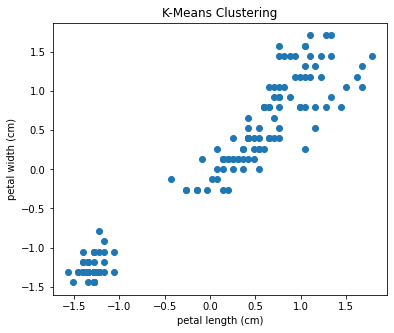

In [9]:
#Plotting data to estimate no.of clusters
x = pd.DataFrame(x, columns = features)
plt.figure(figsize=(6,5))
plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');
plt.title('K-Means Clustering')

In [12]:
#Finding optimum of clusters for K-Means clustering
wcss = []

for i in range(1, 11):
     kmeans = KMeans(n_clusters = i, init = 'k-means++',
                     max_iter = 300 , n_init = 10, random_state = 0)
     kmeans.fit(x)
     wcss.append(kmeans.inertia_)

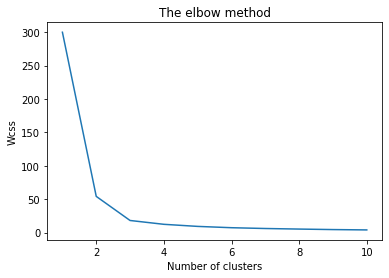

In [13]:
#Plotting the results in a line graph
#allowing to observe 'The Elbow'

plt.plot(range(1, 11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

## **This is known as 'The Elbow method',the optimum clusters is where the elbow occurs.This is where the (Wcss) doesn't decrease with every iteration.**

# **K-Means Clustering**

In [15]:
kmeans = KMeans(n_clusters = 3, random_state = 1)

kmeans.fit(x)

KMeans(n_clusters=3, random_state=1)

In [17]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [18]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [29]:
centroids

array([[-1.30487835, -1.25512862],
       [ 1.02813193,  1.12749028],
       [ 0.30564587,  0.16609419]])

## **Visually evaluating the clusters**

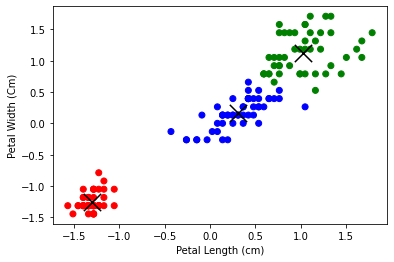

In [34]:
colormap = np.array(['r','g','b'])
plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colormap[labels])
plt.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', c ='k')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (Cm)');           

## **PCA projection in 2D**

In [57]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1','principal component 2'])


In [59]:
df = pd.read_csv('Iris.csv')

## **2D Projection**

In [62]:
finalDf = pd.concat([principalDf, df[['Species']]],axis = 1)
finalDf

,principal component 1,principal component 2,Species
0,-1.876838,0.020008,Iris-setosa
1,-1.876838,0.020008,Iris-setosa
2,-1.917048,0.060218,Iris-setosa
3,-1.836627,-0.020202,Iris-setosa
4,-1.876838,0.020008,Iris-setosa
...,...,...,...
145,1.603421,0.444297,Iris-virginica
146,1.151139,0.152856,Iris-virginica
147,1.324525,0.165401,Iris-virginica
148,1.683841,0.363877,Iris-virginica


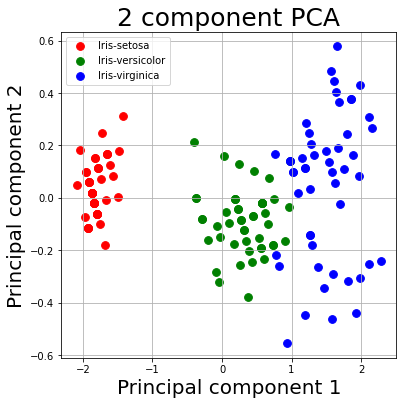

In [66]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6));
targets = df.loc[: ,'Species'].unique()
colors = ['r','g','b']

for target, color in zip(targets,colors):
  indicesToKeep = finalDf['Species'] == target
  ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
             ,finalDf.loc[indicesToKeep,'principal component 2']
             ,c = color,s = 60)
ax.set_xlabel('Principal component 1',fontsize = 20)
ax.set_ylabel('Principal component 2',fontsize = 20)
ax.set_title('2 component PCA',fontsize = 25)
ax.legend(targets)
ax.grid()

## ***From the above graph it is clear that the setosa class is well separated from the versicolor and virginica classes***